In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:
with open('/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/corrT2_press/prod1_corr_ampl/history_corr1ampl50.pkl', 'rb') as f:
    data2d = pkl.load(f)
with open('/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/corrT2_press/prod1_corr_ampl/history_corr0ampl50.pkl', 'rb') as f:
    data1d = pkl.load(f)

In [3]:
data1d.keys()

dict_keys(['times', 'internal_energy', 'flux_density', 'ddt_internal_energy'])

In [4]:
data2d.keys()

dict_keys(['times', 'internal_energy', 'flux_density', 'ddt_internal_energy', 'alternatives'])

In [5]:
data2d['alternatives'].keys()

dict_keys(['B1d_sep', 'B1d_avg', 'B1d_avgScaled', 'B2d_scaled', 'identity'])

In [6]:
data2d['alternatives']['B1d_sep'].keys()

dict_keys(['internal_energy', 'flux_density', 'ddt_internal_energy'])

0.9999999999999821
0.9999999999999821
0.9999795150035318
4.9102555829796695e-29 4.9102555829797575e-29
4.910001376089826e-29 4.9102555829797575e-29


/home/ppjanka/anaconda3/envs/intsh2/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/home/ppjanka/anaconda3/envs/intsh2/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/ppjanka/anaconda3/envs/intsh2/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes u

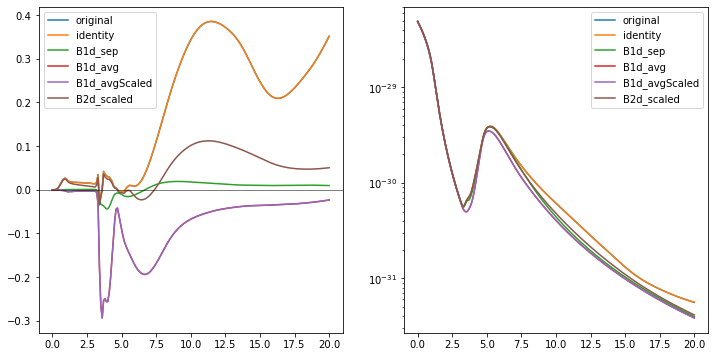

In [7]:
plt.figure(figsize=(12,6))

# original: 1D and 2D runs calculated separately
flux2d = data2d['flux_density']
relDiff = 2 * (flux2d-data1d['flux_density']) / (flux2d+data1d['flux_density'])
plt.subplot(121)
plt.plot(data2d['times'], relDiff, label='original')
plt.subplot(122)
plt.plot(data2d['times'], flux2d, label='original')

# - identity unit test
alternative = 'identity'
flux2d = np.array(data2d['alternatives'][alternative]['flux_density'])
relDiff = 2 * (flux2d-data1d['flux_density']) / (flux2d+data1d['flux_density'])
print(flux2d[0] / data1d['flux_density'][0])
plt.subplot(121)
plt.plot(data2d['times'], relDiff, label=alternative)
plt.subplot(122)
plt.plot(data2d['times'], flux2d, label=alternative)

# - with Bfield from a separate non-corrugated (1D) run
alternative = 'B1d_sep'
flux2d = np.array(data2d['alternatives'][alternative]['flux_density'])
relDiff = 2 * (flux2d-data1d['flux_density']) / (flux2d+data1d['flux_density'])
print(flux2d[0] / data1d['flux_density'][0])
plt.subplot(121)
plt.plot(data2d['times'], relDiff, label=alternative)
plt.subplot(122)
plt.plot(data2d['times'], flux2d, label=alternative)

# - with Bfield from the corrugated (2D) run but vertically-averaged into a 1D structure
alternative = 'B1d_avg'
flux2d = data2d['alternatives'][alternative]['flux_density']
relDiff = 2 * (flux2d-data1d['flux_density']) / (flux2d+data1d['flux_density'])
print(flux2d[0] / data1d['flux_density'][0])
plt.subplot(121)
plt.plot(data2d['times'], relDiff, label=alternative)
plt.subplot(122)
plt.plot(data2d['times'], flux2d, label=alternative)

# - with the above scaled so that the average is the same as the 1D run, leaving only the horizontal structure (but not the overall bfield enhancement)
alternative = 'B1d_avgScaled'
flux2d = data2d['alternatives'][alternative]['flux_density']
relDiff = 2 * (flux2d-data1d['flux_density']) / (flux2d+data1d['flux_density'])
print(flux2d[0], data1d['flux_density'][0])
plt.subplot(121)
plt.plot(data2d['times'], relDiff, label=alternative)
plt.subplot(122)
plt.plot(data2d['times'], flux2d, label=alternative)

# - with Bfield from the corrugated (2D) run scaled down so that the average matches the 1D case, leaving only the 2D structure (but not the overall bfield enhancement)
alternative = 'B2d_scaled'
flux2d = data2d['alternatives'][alternative]['flux_density']
relDiff = 2 * (flux2d-data1d['flux_density']) / (flux2d+data1d['flux_density'])
mask = np.where(relDiff < 0.2)[0]
print(flux2d[0], data1d['flux_density'][0])
plt.subplot(121)
plt.plot(data2d['times'][mask], relDiff[mask], label=alternative)
plt.subplot(122)
plt.plot(data2d['times'][mask], flux2d[mask], label=alternative)

        
# finalize plot
plt.subplot(121)
plt.legend()
plt.axhline(0., color='k', linewidth=0.5)
plt.subplot(122)
plt.legend()
plt.gca().set_yscale('log')
plt.show(); plt.close()